<a href="https://colab.research.google.com/github/nurchamidah/Self-Project/blob/main/A_B_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
# Read dataset from Github (use raw link)
data = pd.read_csv("https://raw.githubusercontent.com/akmalf/learn_data/main/loan_data.csv")

# Replace "." to "_" and normalize column title
data.columns = data.columns.str.replace(".", "_").str.lower()

# Display the first few rows of the dataframe
data.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Data about giving credit to other people. Yang perlu dilihat adalah fico. Fico adalah kredit skor yang bisa menentukan seberapa layak orang untuk diberikan pinjaman

In [7]:
# Get data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# Hypothesis Testing

Suppose that we want to examine the fico score of incoming loan applications for credit card purpose, purpose == "credit_card".
spesifically we want to examine whether our average FICO score of those loans are less than 717 (the letest number available pf the industru wide average)

In [8]:
# Get data with purpose == credit_card
data_credit = data[data.purpose == "credit_card"]
data_credit.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0
22,1,credit_card,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0


In [22]:
# Calculate the mean of FICO score
round(data_credit['fico'].mean(),0)

710.0

In [14]:
data_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1262 entries, 1 to 9559
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      1262 non-null   int64  
 1   purpose            1262 non-null   object 
 2   int_rate           1262 non-null   float64
 3   installment        1262 non-null   float64
 4   log_annual_inc     1262 non-null   float64
 5   dti                1262 non-null   float64
 6   fico               1262 non-null   int64  
 7   days_with_cr_line  1262 non-null   float64
 8   revol_bal          1262 non-null   int64  
 9   revol_util         1262 non-null   float64
 10  inq_last_6mths     1262 non-null   int64  
 11  delinq_2yrs        1262 non-null   int64  
 12  pub_rec            1262 non-null   int64  
 13  not_fully_paid     1262 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 147.9+ KB


There are 1.262 loan applications inour data that satisfy those requirements. The average FICO score on our population is 710, slightly lower than industri average

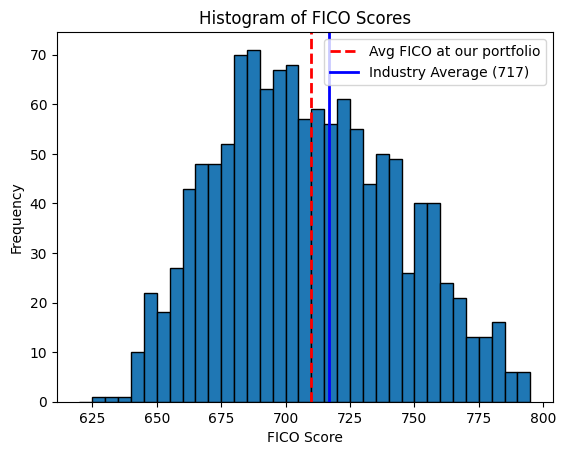

In [34]:
# Draw a histogram of FICO score with vertical line on 660 and binwidth of 5
# Draw histogram
plt.hist(data_credit['fico'], bins=np.arange(620, 800, 5), edgecolor='black')

# Add vertical line at avergae FICO score
plt.axvline(round(data_credit['fico'].mean(),0), color='red', linestyle='--', linewidth=2, label='Avg FICO at our portfolio')

# Menambahkan garis vertikal pada rata-rata industri (717)
plt.axvline(x=717, color='blue', linestyle='-', linewidth=2, label='Industry Average (717)')

# Menambahkan judul dan label
plt.title('Histogram of FICO Scores')
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.legend()

# Menampilkan plot
plt.show()

Dari grafik di atas dapat dilihat bahwa distribusi datanya seperti distibusi normal. Score paling kecil ada di 625 dan paling besar mendekati angka 800. Sedangkan rata-rata industri ada di 717 dan rata-rata FICO score portfolio kita ada di 710. Maka akan digunakan hyposthesis testing untuk mengetahui apakah benar kredit scorenya lebih jelek dibanding industri dengan t-test

## Hypothesis Testing Setup

**Step 1: Define the Hypotheses**
The relevant null in our case are:

H0: The average FICO score on our portfolio >= 717 (we want reject this)

H1:The average FICO score on our portfolio < 717

**Step 2: Select significance level (a)**
Let's say we want to test at 5% significant level, it menas that probability of rejecting the H0 when H0 is true is at most 5%

**Step 3: Collect data**

**Step 4: Calculate the test statistic**

**Step 5: Determine p-value**

**Step 6: Make a decisions**

## Hypothesis Testing Result

In [12]:
# Perform one-sample t-test
result = stats.ttest_1samp(a=data_credit['fico'],
                           popmean=717,
                           alternative='less')

# Print the test statistic and p-value
print("P-value:", result.pvalue)

# Compare p-value to significance level
alpha = 0.05
if result.pvalue < alpha:
    print("Reject the null hypothesis. The average FICO score in our portfolio is likely less than 717.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest the average FUCO score in our portfolio.")

P-value: 1.6575122226406014e-13
Reject the null hypothesis. The average FICO score in our portfolio is likely less than 717.


## Insights and Next Step

From this hypothesis testing, we can see that we have strong argument to say that our incoming application quality is less good than industry average, as measured by FICO score.

For bank portfolio managers, this information may lead to:
*   Reconsideration of minimum FICO score for loan approval
*   Explore incorporating alterbative data sources for a more holistic risk assessment
*   Working with sales & marketing team to find ways to reach higher-quality applicants





# A/B Test

Formulate hypotheses: define what you are testing

Null hypothesis (H0): no difference between A and B

Alternative hypothesis (H1): there is difference between A and B

Design experiment: split sample into two groups (Groups A and groups B)

Collect data: gather data on both groups

Analyze results: use statistical methods
to compare outcomes

Draw conclutions: determine which version performs better

**Currently in our data we see two different credit policies. The average of our data grouped by the credit policy shown below**

In [13]:
# Look the difference of credit policy
data_credit.select_dtypes(include='number').groupby('credit_policy').mean().T

credit_policy,0,1
int_rate,0.138055,0.115392
installment,291.823264,326.067324
log_annual_inc,11.051552,11.046205
dti,15.350620,13.802539
fico,681.090909,716.397059
days_with_cr_line,4462.884986,4950.513072
revol_bal,40245.066116,19131.254902
revol_util,59.936364,52.097255
inq_last_6mths,3.438017,0.900980
delinq_2yrs,0.190083,0.142157


Based on FICO, credit policy 1 is better than credit policy 0.

Revol util: utilization of using the credit. More big revol util number more good. From the data revol_util credit policy 0 is better than credit policy 1. Credit policy 0 is generating higher revolving utilization compared to credit policy 1, despite the almost equal annual income of the borrower.

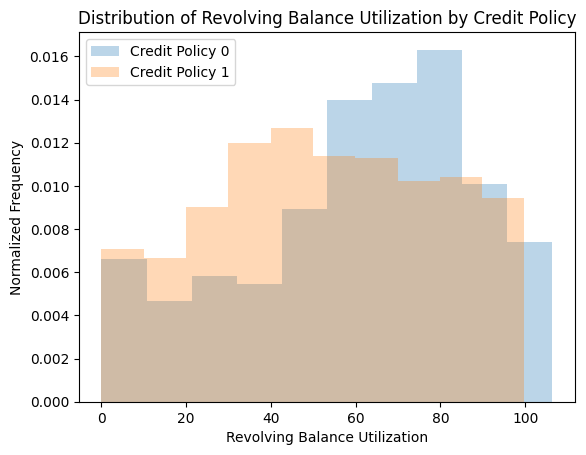

In [15]:
# Visualize the data

# Generate two histogram of revol_util by credit_policy with transparency of 0.3 with normalized frequency
plt.hist(data_credit[data_credit['credit_policy'] == 0]['revol_util'], alpha=0.3, density=True, label='Credit Policy 0')
plt.hist(data_credit[data_credit['credit_policy'] == 1]['revol_util'], alpha=0.3, density=True, label='Credit Policy 1')

# Add labels and title
plt.xlabel('Revolving Balance Utilization')
plt.ylabel('Normalized Frequency')
plt.title('Distribution of Revolving Balance Utilization by Credit Policy')

# Add legend and show plot
plt.legend()
plt.show()

Dari data di atas, banyak data yang overlap. Jadi, tanpa melihat hasil A/B testing terjadi ketidak yakinan bahwa secara statistik credit policy 0 dan 1 menghasilkan revolving utilization yang beda jauh. Jadi perlu A/B testing

## A/B Testing Setup

Null hypothesis (H0): no difference between credit policy 0 & 1 on revolving utilization (we want to reject this)

Alternative hypothesis (H1): there is difference between credit policy 0 & 1 on revolving utilization

Select significance level (alpha)

Let's say we want to test at 5% significance level. It menas that probability of rejecting the H0 when H0 is true is at most 5%.

Collect data

Calculate the test statistic

Determine p-value

make a decision

## A/B Testing Result

In [16]:
# T-test of revol_util between credit_polict groups

# Perform the t-test
t_stat, p_value = stats.ttest_ind(
    data_credit[data_credit['credit_policy'] == 0]['revol_util'], #Group A
    data_credit[data_credit['credit_policy'] == 1]['revol_util']) # Group B

# Print the test statistic and p-value
print("P-value:", p_value)

# Compare p-value to significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in revolving balance utilization between credit policy 0 and 1.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to suggest a significant difference in revolving balance utilization between credit policy 0 and 1.")

P-value: 5.146357997059106e-05
Reject the null hypothesis. There is a significant difference in revolving balance utilization between credit policy 0 and 1.


## Insights and Next Step

The result of the A/B testing suggest that the credit policy 0 is leading to customers carying a higher average balance on their revolving credit lines (like credit card) compared to the other policy.

Depending on the current situation in portfolio, this may leads to riskier borrower.

A risk manager would like then to ask, are delinquency rates higher with the policy to higher utilization? This would indicate a potential credit risk issue.

In [21]:
# Grouping the data by 'credit_policy'
group1_fico = data_credit[data_credit['credit_policy'] == 1]['fico']
group2_fico = data_credit[data_credit['credit_policy'] == 0]['fico']
group1_revol = data_credit[data_credit['credit_policy'] == 1]['revol_util']
group2_revol = data_credit[data_credit['credit_policy'] == 0]['revol_util']

# Perform a two-sample t test for FICO score
t_stat_fico, p_value_fico = stats.ttest_ind(group1_fico, group2_fico, equal_var=False)

# Perform a two-sample t test for revolving utiliztion
t_stat_revol, p_value_revol = stats.ttest_ind(group1_revol, group2_revol, equal_var=False)

# Show FICO score test results
print("FICO Score Test")
print(f"t-statistic: {t_stat_fico}")
print(f"p-value: {p_value_fico}")
print(f"Mean FICO score for credit policy 1: {group1_fico.mean()}")
print(f"Mean FICO score for credit policy 0: {group2_fico.mean()}")

# Show revolving utilization score test results
print("\nRevolving Utilization Test")
print(f"t-statistic: {t_stat_revol}")
print(f"p-value: {p_value_revol}")
print(f"Mean revolving utilization for credit policy 1: {group1_revol.mean()}")
print(f"Mean revolving utilization for credit policy 0: {group2_revol.mean()}")

# Conclution
if p_value_fico < 0.05:
    if group1_fico.mean() > group2_fico.mean():
        print("\nCredit policy 1 is better based on FICO score.")
    else:
        print("\nCredit policy 0 is better based on FICO score.")
else:
    print("\nNo significant difference in FICO score between the two credit policies.")

if p_value_revol < 0.05:
    if group1_revol.mean() < group2_revol.mean():
        print("Credit policy 0 is better based on revolving utilization.")
    else:
        print("Credit policy 1 is better based on revolving utilization.")
else:
    print("No significant difference in revolving utilization between the two credit policies.")

FICO Score Test
t-statistic: 15.911806532555675
p-value: 2.8216486932864917e-44
Mean FICO score for credit policy 1: 716.3970588235294
Mean FICO score for credit policy 0: 681.0909090909091

Revolving Utilization Test
t-statistic: -3.998651780824203
p-value: 7.74218461438894e-05
Mean revolving utilization for credit policy 1: 52.09725490196078
Mean revolving utilization for credit policy 0: 59.93636363636364

Credit policy 1 is better based on FICO score.
Credit policy 0 is better based on revolving utilization.
